In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import math

In [2]:
path_generated_go = r'GO_noGO Data Set_Images/TestGo//'
path_generated_nogo = r'GO_noGO Data Set_Images/TestNoGo//'

In [3]:
files_go = list(os.walk(path_generated_go))[0][2]
files_go[:10]

['Img6081.png',
 'Img1936.png',
 'Img6095.png',
 'Img6903.png',
 'Img8090.png',
 'Img8084.png',
 'Img333.png',
 'Img6917.png',
 'Img6724.png',
 'Img6042.png']

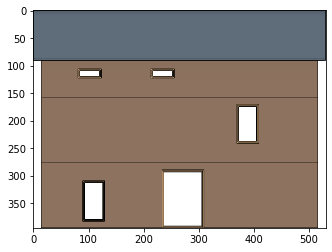

In [110]:
image = cv2.imread(path_generated_go+files_go[-4])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [111]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [112]:
edges = cv2.Canny(gray, 80, 120)
lines = cv2.HoughLinesP(edges, rho = 1, theta = math.pi/2, minLineLength = 400, threshold = 1, maxLineGap = 3);
for line in lines[0]:
    pt1 = (line[0],line[1])
    pt2 = (line[2],line[3])
    cv2.line(image, pt1, pt2, (0,0,255), 3)

cv2.imwrite('test.jpg', image)


True

In [113]:
lines

array([[[ 14, 276, 516, 276]],

       [[ 14, 278, 516, 278]],

       [[  1,   1, 529,   1]],

       [[ 15,  90, 515,  90]],

       [[  0,  87, 530,  87]],

       [[  1,  92, 529,  92]],

       [[ 14, 158, 516, 158]],

       [[ 14, 160, 516, 160]]], dtype=int32)

In [114]:
lines = lines.tolist()
nrow = len(lines)
for i in lines:
    for j in lines:
        if j != i and abs(i[0][1]-j[0][1]) < 15:
            lines.remove(j)
            

            
            

In [120]:
def count_level(img):
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    shape = gray.shape
    width = shape[1]
    edges = cv2.Canny(gray, 80, 120)
    lines = cv2.HoughLinesP(edges, rho = 1, theta = math.pi/2, minLineLength = 0.8*width, threshold = 1, maxLineGap = 3)
    lines = lines.tolist()
    for i in lines:
        for j in lines:
            if j != i and abs(i[0][1]-j[0][1]) < 15:
                lines.remove(j)
    return len(lines)-1

In [121]:
image = cv2.imread(path_generated_go+files_go[-4])

In [122]:
count_level(image)

3